In [1]:
try:
  %tensorflow_version 2.x
except:
  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, GlobalMaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

TensorFlow 2.x selected.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()
K = len(set(y_train))
print(f'Number of classes: {K}')

170500096/170498071 [==============================] - 4s 0us/step
Number of classes: 10


ship


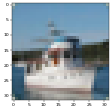

Continue? (Y/n): n


In [3]:
labels = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck',
]
assert len(labels) == K
while True:
  i = np.random.choice(range(N_train))
  plt.figure(dpi=32)
  plt.imshow(x_train[i])
  # plt.title(labels[y_train[i]])
  print(labels[y_train[i]])
  plt.show()
  if input(prompt='Continue? (Y/n): ') == 'n': break

In [0]:
# Normalize pixel intensities between [-1, 1]
if x_train.max() > 1:
  x_train, x_test = 2.*x_train/255. - 1., 2.*x_test/255. - 1.

In [5]:
i = Input(x_train.shape[1:])  # shape = (32, 32, 3)
x = i

# With such small images, MaxPool2D works better than adding stride=2 to each second Conv2D layer.
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)  
x = BatchNormalization()(x)

x = MaxPool2D((2,2))(x)  # shape = (16, 16, 32)

x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)  
x = BatchNormalization()(x)

x = MaxPool2D((2,2))(x)  # shape = (8, 8, 64)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)  
x = BatchNormalization()(x)

x = MaxPool2D((2,2))(x)  # shape = (4, 4, 128)

x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
# The extra Conv2D layer almost doubles # parameters, without benefits (only increases overfitting).
# x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(x)  
# x = BatchNormalization()(x)

# GlobalMaxPool2D performs better than MaxPool2D + Flatten, with less parameters.
# x = MaxPool2D((2,2))(x)  # shape = (2, 2, 256)
# x = Flatten()(x)  # shape = (1024)
x = GlobalMaxPool2D()(x)  # shape = (256)

# The two Dropout() layers improve generalization.
x = Dropout(0.2)(x)
x = Dense(units=256, activation='relu')(x)  # no need for more units
x = Dropout(0.2)(x)
x = Dense(units=K, activation='softmax')(x)

m = Model(i, x)
m.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [0]:
r = m.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=25)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 40s 792us/sample - loss: 1.3827 - accuracy: 0.5053 - val_loss: 0.9749 - val_accuracy: 0.6541
Epoch 2/25
50000/50000 [==============================] - 37s 745us/sample - loss: 0.9145 - accuracy: 0.6804 - val_loss: 0.7706 - val_accuracy: 0.7266
Epoch 3/25
50000/50000 [==============================] - 37s 740us/sample - loss: 0.7232 - accuracy: 0.7537 - val_loss: 0.6780 - val_accuracy: 0.7746
Epoch 4/25
50000/50000 [==============================] - 37s 733us/sample - loss: 0.6052 - accuracy: 0.7937 - val_loss: 0.6045 - val_accuracy: 0.8003
Epoch 5/25
50000/50000 [==============================] - 36s 726us/sample - loss: 0.5211 - accuracy: 0.8256 - val_loss: 0.5870 - val_accuracy: 0.7972
Epoch 6/25
50000/50000 [==============================] - 38s 768us/sample - loss: 0.4463 - accuracy: 0.8501 - val_loss: 0.5359 - val_accuracy: 0.8246
Epoch 7/25
50000/50000 [====================

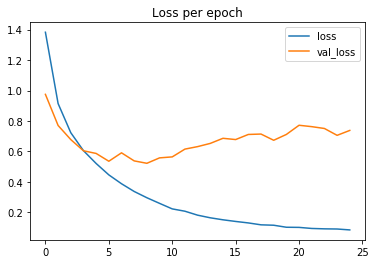

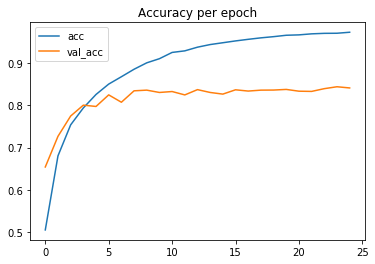

In [0]:
plt.title('Loss per epoch')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.title('Accuracy per epoch')
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


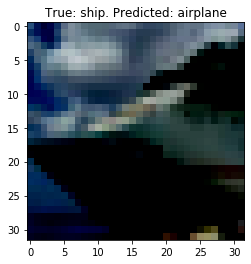

Continue? (Y/n): n


In [0]:
# Show some misclassified examples
p_test = m.predict(x_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
while True:
  i = np.random.choice(misclassified_idx)
  plt.imshow(x_test[i], cmap='gray')
  plt.title("True: %s. Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
  plt.show()
  if input(prompt='Continue? (Y/n): ') == 'n': break

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[853   5  43  12  22   2   4   2  44  13]
 [  7 921   6   3   1   1   7   0  13  41]
 [ 28   0 803  41  56  17  33  16   4   2]
 [ 10   0  70 717  54  80  38  15  11   5]
 [  1   0  54  28 871  13  13  17   3   0]
 [  7   2  51 139  44 716  11  26   2   2]
 [  3   0  54  26  20   8 880   6   3   0]
 [ 12   1  22  33  44  20   2 858   3   5]
 [ 42  13   8   6   2   2   6   2 902  17]
 [ 14  51   7   7   4   3   4   5  16 889]]


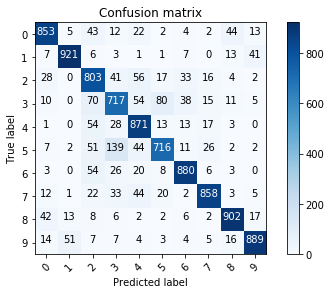

In [0]:
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

### With data augmentation (SLOW!)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

m2 = m
m2.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

batch_size = 32
steps_per_epoch = x_train.shape[0] // batch_size
data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.20,
    rotation_range=20)
train_generator = data_generator.flow(x_train, y_train, batch_size)

In [0]:
r2 = m2.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=25)

Epoch 1/25
1562/1562 [==============================] - 124s 80ms/step - loss: 1.5917 - accuracy: 0.4295 - val_loss: 1.2594 - val_accuracy: 0.5478
Epoch 2/25
1562/1562 [==============================] - 120s 77ms/step - loss: 1.1676 - accuracy: 0.5901 - val_loss: 0.9897 - val_accuracy: 0.6494
Epoch 3/25
1562/1562 [==============================] - 120s 77ms/step - loss: 0.9789 - accuracy: 0.6650 - val_loss: 0.7554 - val_accuracy: 0.7401
Epoch 4/25
1562/1562 [==============================] - 120s 77ms/step - loss: 0.8720 - accuracy: 0.7021 - val_loss: 0.7509 - val_accuracy: 0.7385
Epoch 5/25
1562/1562 [==============================] - 118s 76ms/step - loss: 0.7980 - accuracy: 0.7305 - val_loss: 0.6424 - val_accuracy: 0.7815
Epoch 6/25
1562/1562 [==============================] - 118s 76ms/step - loss: 0.7381 - accuracy: 0.7498 - val_loss: 0.6116 - val_accuracy: 0.7957
Epoch 7/25
1562/1562 [==============================] - 118s 76ms/step - loss: 0.6879 - accuracy: 0.7666 - val_loss: 0

In [0]:
plt.title('Loss per epoch')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.title('Accuracy per epoch')
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
p2_test = m.predict(x_test).argmax(axis=1)
cm2 = confusion_matrix(y_test, p2_test)
plot_confusion_matrix(cm2, list(range(10)))